# Getting Started

In [44]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from sklearn.metrics import classification_report

In [45]:
#training data for part 2
train_df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/data set/digit recognizer/train.csv')
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
#bringing in the test data now so it is ready in the last step
test = pd.read_csv('/content/drive/MyDrive/Coding Dojo/data set/digit recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
train_df.info() #get a preview for nulls, dtypes, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


## Visualization of Frequency of the Numbers
Is one number more likely than others? Is this a trend our model could pick up on?

In [70]:
plt.style.use('seaborn')

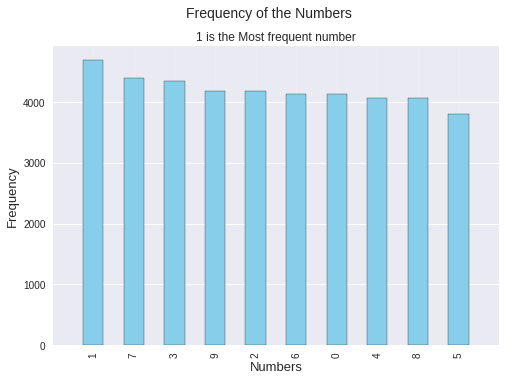

In [167]:
#barchart of counts
train_df['label'].value_counts().plot(kind = 'bar', edgecolor = 'black', color = 'skyblue')
plt.suptitle('Frequency of the Numbers', fontsize = 14)
plt.ylabel('Frequency', fontsize = 13)
plt.xlabel('Numbers', fontsize = 13)
plt.xlim(-1,10)
plt.title('1 is the Most frequent number')
plt.grid(axis = 'x', alpha =0.2);

## Data Cleaning

In [50]:
#checking for duplicates
train_df.duplicated().any()
#there are no duplicates

False

In [51]:
train_df.shape
#how many rows and columns. 42000 rows, 784 pixels + our target = columns

(42000, 785)

In [52]:
#check ranges (number errors or issues)
train_df.describe()
#many rows have a range of 0 to 0, showing they are black space on all images.

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Model Prep

In [53]:
X = train_df.drop(columns = 'label')
y = train_df['label']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y) #stratify will help to make sure there are an equal amount of each class in the train and test

In [55]:
#how much of each class is in the train and test?
unique, counts = np.unique(y_train, return_counts=True)
print('Counts of each class in Training:', dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print('Counts of each class in Test:', dict(zip(unique, counts)))
#every number is representated

Counts of each class in Training: {0: 3099, 1: 3513, 2: 3133, 3: 3263, 4: 3054, 5: 2846, 6: 3103, 7: 3301, 8: 3047, 9: 3141}
Counts of each class in Test: {0: 1033, 1: 1171, 2: 1044, 3: 1088, 4: 1018, 5: 949, 6: 1034, 7: 1100, 8: 1016, 9: 1047}


### Reshape and **scaling**

In [56]:
X_train.shape 
#we need to reshape into a 28 x 28 and scale our data

(31500, 784)

In [57]:
#scale data
#pixel values are 255 (darkness of pixels)
X_train = X_train/255
X_test = X_test/255

In [58]:
#reshape data
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1) # 1 as it is grayscale #784 is 28 x 28
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [59]:
X_train.shape #now it is in correct format

(31500, 28, 28, 1)

### Number Visualization

I can actually get a preview of what these numbers in our training data look like. There are 223,470 different ones to choose from.
DISCLAIMER: what I got in my run throughs of numbers will be different than what you may get if you rerun the code. 

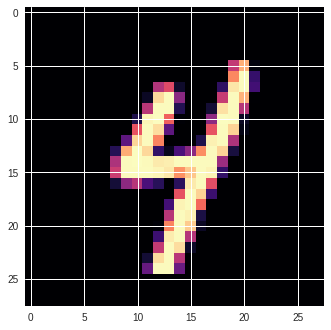

In [174]:
#OR https://towardsdatascience.com/how-to-classify-handwritten-digits-in-python-7706b1ab93a3
# Take a look at what the images look like
random_index = np.random.randint(0,X_train.shape[0])
img = X_train[random_index].reshape(28,28)
plt.imshow(img, cmap = 'magma');
#this is a preview of what some of the numbers could be

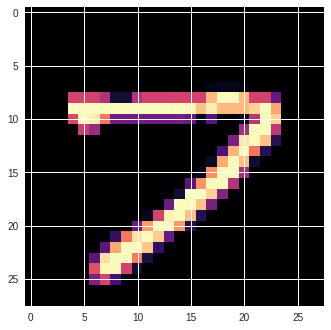

In [175]:
#OR https://towardsdatascience.com/how-to-classify-handwritten-digits-in-python-7706b1ab93a3
random_index = np.random.randint(0,X_train.shape[0])
img = X_train[random_index].reshape(28,28)
plt.imshow(img, cmap = 'magma');
#since it is randomized, you can run it again and get another #/handwritten #

#### Turning our y into categoricals

In [62]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes=10) #there are 10 classes so we need to define those (1-9 and 0, so we have ten numbers)

#### Defining the input shape

In [63]:
input_shape = X_train.shape[1:4] #this is the last three numbers of the shape, he 28 x 28 (image/pixels) and the 1 (grayscale). This lets the model know what size to expect for each row.
input_shape

(28, 28, 1)

## The Model (Convulutional Neural Network)

### First Run through

In [64]:
#step 1 define our structure
model = Sequential()

#first layer: convulutional layer
model.add(Conv2D(filters = 8, 
                 kernel_size = 3, 
                 input_shape = input_shape))

#need to add pooling later
model.add(MaxPooling2D(pool_size = 2)) 

#flattening layer
model.add(Flatten()) 

#output layer (dense layer)
model.add(Dense(10, activation = 'softmax')) #the dense layers is the number of classes

#step 2 compile
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['acc']) #metrics could have multiple, over time, shows how many epochs

#step 3 fit it
history_ = model.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     epochs = 20)

Epoch 1/20
985/985 [==============================] - 12s 12ms/step - loss: 0.4307 - acc: 0.8803 - val_loss: 0.2818 - val_acc: 0.9200
Epoch 2/20
985/985 [==============================] - 10s 10ms/step - loss: 0.2499 - acc: 0.9290 - val_loss: 0.2315 - val_acc: 0.9315
Epoch 3/20
985/985 [==============================] - 10s 10ms/step - loss: 0.2026 - acc: 0.9432 - val_loss: 0.2077 - val_acc: 0.9390
Epoch 4/20
985/985 [==============================] - 10s 10ms/step - loss: 0.1698 - acc: 0.9517 - val_loss: 0.1790 - val_acc: 0.9483
Epoch 5/20
985/985 [==============================] - 10s 10ms/step - loss: 0.1438 - acc: 0.9592 - val_loss: 0.1601 - val_acc: 0.9526
Epoch 6/20
985/985 [==============================] - 10s 10ms/step - loss: 0.1219 - acc: 0.9646 - val_loss: 0.1430 - val_acc: 0.9587
Epoch 7/20
985/985 [==============================] - 10s 10ms/step - loss: 0.1053 - acc: 0.9700 - val_loss: 0.1268 - val_acc: 0.9615
Epoch 8/20
985/985 [==============================] - 10s 10ms

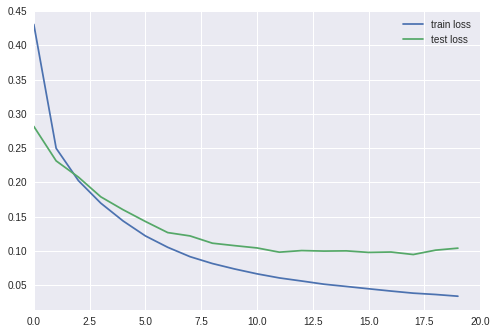

In [73]:
#LP
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.xlim(0,20) 
plt.legend();

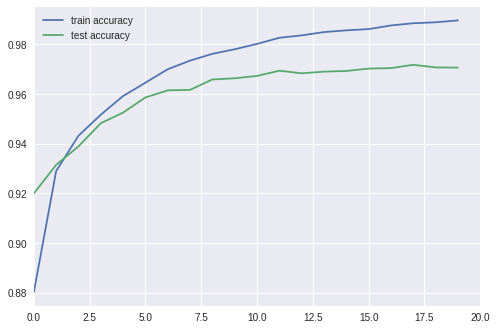

In [74]:
plt.plot(history_.history['acc'], label = 'train accuracy')
plt.plot(history_.history['val_acc'], label = 'test accuracy')
plt.xlim(0,20)
plt.legend();
#pretty good start! our training isn't too much overfit. looks like it still might have been trying to improve over time. 
#can add more epochs and add in some early stopping to make sure we don't go too far if we plateau past these 20 epochs

It is also important to note, on the above plots, the epoch 1 is 0, so although there are 20 epochs, the graph ends at 19 on the x axis.

### Attempt 2: Dropout and Early Stopping
Dropout is a way to help fix overfit models. It does so by not learning weights and biases that are a little too perfect during the training set. Once dropped out, these neurons do not continue to the next round.

Early stopping is a function that detects patterns in the epochs and helps to halt redundancy.

In [67]:
%%time
#added the time to show long long this model took to complete (shows at bottom of output)
#step 1 define our structure
model2 = Sequential()

#first layer: convulutional layer
model2.add(Conv2D(filters = 8, 
                 kernel_size = 3, 
                 input_shape = input_shape))

#need to add pooling later
model2.add(MaxPooling2D(pool_size = 2)) 

#flattening layer
model2.add(Flatten()) 

#output layer (dense layer)
model2.add(Dense(10, activation = 'softmax')) 
model2.add(Dropout(.2)) #Dropout is a portion that can be left out, in this case a 20% chance of dropout 

#step 2 compile
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['acc']) 
early_stopping = EarlyStopping(patience = 3)
#step 3 fit it
history_2 = model2.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     epochs = 50,
                     callbacks = [early_stopping])

Epoch 1/50
985/985 [==============================] - 11s 11ms/step - loss: 3.5454 - acc: 0.7103 - val_loss: 0.2858 - val_acc: 0.9153
Epoch 2/50
985/985 [==============================] - 10s 10ms/step - loss: 3.4000 - acc: 0.7460 - val_loss: 0.2597 - val_acc: 0.9250
Epoch 3/50
985/985 [==============================] - 11s 12ms/step - loss: 3.4064 - acc: 0.7539 - val_loss: 0.2242 - val_acc: 0.9332
Epoch 4/50
985/985 [==============================] - 10s 10ms/step - loss: 3.3055 - acc: 0.7662 - val_loss: 0.1967 - val_acc: 0.9419
Epoch 5/50
985/985 [==============================] - 10s 10ms/step - loss: 3.3139 - acc: 0.7697 - val_loss: 0.1691 - val_acc: 0.9504
Epoch 6/50
985/985 [==============================] - 12s 12ms/step - loss: 3.3132 - acc: 0.7736 - val_loss: 0.1482 - val_acc: 0.9570
Epoch 7/50
985/985 [==============================] - 10s 10ms/step - loss: 3.2804 - acc: 0.7788 - val_loss: 0.1387 - val_acc: 0.9597
Epoch 8/50
985/985 [==============================] - 10s 10ms

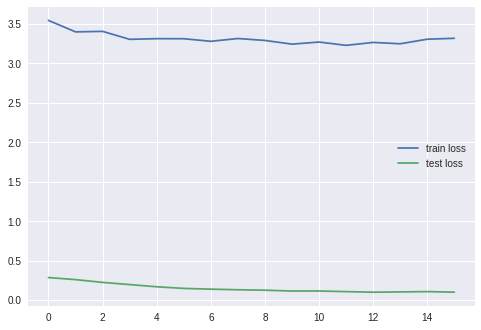

In [75]:
#LP
plt.plot(history_2.history['loss'], label = 'train loss')
plt.plot(history_2.history['val_loss'], label = 'test loss')
plt.legend();

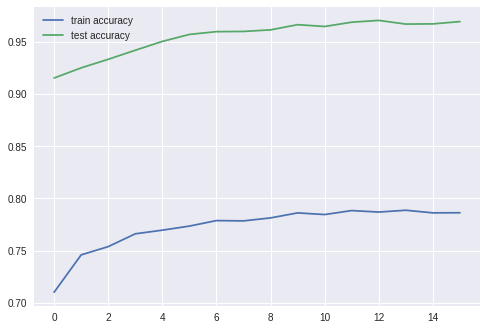

In [76]:
plt.plot(history_2.history['acc'], label = 'train accuracy')
plt.plot(history_2.history['val_acc'], label = 'test accuracy')
plt.legend();
#did not achieve much with this. epoch stopped around the same time so that was not our issue
#now model is underfit (dropout not helpful)

### Attempt 3

In [80]:
%%time
#https://towardsdatascience.com/the-quest-of-higher-accuracy-for-cnn-models-42df5d731faf suggests also increases number of filters and other ideas for improving CNN
#we'll add more filters

#step 1 define our structure
model3 = Sequential()

#first layer: convulutional layer
model3.add(Conv2D(filters = 16, #doubling filters
                 kernel_size = 3, 
                 input_shape = input_shape))

#need to add pooling later
model3.add(MaxPooling2D(pool_size = 2)) 

#flattening layer
model3.add(Flatten()) 

#output layer (dense layer)
model3.add(Dense(10, activation = 'softmax'))
#dropout removed since it made our model underfit

#step 2 compile
model3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['acc']) 
early_stopping = EarlyStopping(patience = 3)

#step 3 fit it
history_3 = model3.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     epochs = 50,
                     callbacks = [early_stopping])

Epoch 1/50
985/985 [==============================] - 12s 12ms/step - loss: 0.3745 - acc: 0.8964 - val_loss: 0.2357 - val_acc: 0.9323
Epoch 2/50
985/985 [==============================] - 11s 12ms/step - loss: 0.2028 - acc: 0.9429 - val_loss: 0.1801 - val_acc: 0.9492
Epoch 3/50
985/985 [==============================] - 11s 11ms/step - loss: 0.1497 - acc: 0.9586 - val_loss: 0.1475 - val_acc: 0.9588
Epoch 4/50
985/985 [==============================] - 11s 11ms/step - loss: 0.1174 - acc: 0.9668 - val_loss: 0.1333 - val_acc: 0.9620
Epoch 5/50
985/985 [==============================] - 11s 11ms/step - loss: 0.0958 - acc: 0.9727 - val_loss: 0.1177 - val_acc: 0.9637
Epoch 6/50
985/985 [==============================] - 11s 11ms/step - loss: 0.0823 - acc: 0.9761 - val_loss: 0.1039 - val_acc: 0.9695
Epoch 7/50
985/985 [==============================] - 11s 11ms/step - loss: 0.0700 - acc: 0.9791 - val_loss: 0.1038 - val_acc: 0.9677
Epoch 8/50
985/985 [==============================] - 11s 11ms

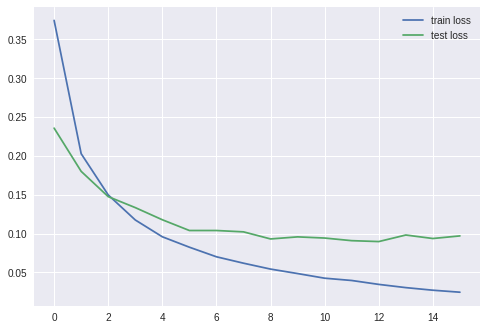

In [81]:
#LP
plt.plot(history_3.history['loss'], label = 'train loss')
plt.plot(history_3.history['val_loss'], label = 'test loss')
plt.legend();

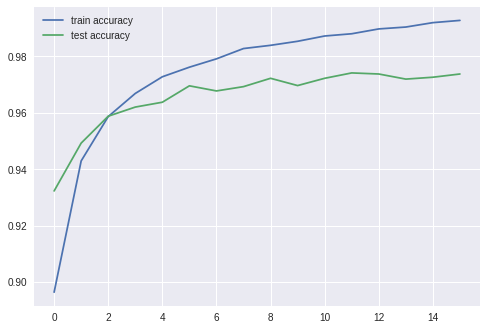

In [82]:
plt.plot(history_3.history['acc'], label = 'train accuracy')
plt.plot(history_3.history['val_acc'], label = 'test accuracy')
plt.legend();
#did not achieve much with this. epoch stopped around the same time so that was not our issue
#model is back to not being underfit

### Attempt 4

In [83]:
%%time
#https://towardsdatascience.com/the-quest-of-higher-accuracy-for-cnn-models-42df5d731faf also suggested adding L2 regularizon
#we'll add more filters

#step 1 define our structure
model4 = Sequential()

#first layer: convulutional layer
model4.add(Conv2D(filters = 16, 
                 kernel_size = 3, 
                 input_shape = input_shape,
                 kernel_regularizer=keras.regularizers.l2(l=0.1))) #https://medium.com/@robertjohn_15390/regularization-in-tensorflow-using-keras-api-48aba746ae21 how to add L2 regularization

#need to add pooling later
model4.add(MaxPooling2D(pool_size = 2)) 

#flattening layer
model4.add(Flatten()) 

#output layer (dense layer)
model4.add(Dense(10, activation = 'softmax'))

#step 2 compile
model4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['acc']) 
early_stopping = EarlyStopping(patience = 5)

#step 3 fit it
history_4 = model4.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     epochs = 50,
                     callbacks = [early_stopping])

Epoch 1/50
985/985 [==============================] - 12s 11ms/step - loss: 0.5233 - acc: 0.8821 - val_loss: 0.3744 - val_acc: 0.9076
Epoch 2/50
985/985 [==============================] - 11s 11ms/step - loss: 0.3484 - acc: 0.9168 - val_loss: 0.3302 - val_acc: 0.9181
Epoch 3/50
985/985 [==============================] - 11s 11ms/step - loss: 0.3109 - acc: 0.9252 - val_loss: 0.3001 - val_acc: 0.9250
Epoch 4/50
985/985 [==============================] - 11s 11ms/step - loss: 0.2877 - acc: 0.9310 - val_loss: 0.2893 - val_acc: 0.9292
Epoch 5/50
985/985 [==============================] - 11s 11ms/step - loss: 0.2716 - acc: 0.9360 - val_loss: 0.2714 - val_acc: 0.9339
Epoch 6/50
985/985 [==============================] - 11s 11ms/step - loss: 0.2573 - acc: 0.9400 - val_loss: 0.2665 - val_acc: 0.9345
Epoch 7/50
985/985 [==============================] - 11s 11ms/step - loss: 0.2473 - acc: 0.9430 - val_loss: 0.2586 - val_acc: 0.9355
Epoch 8/50
985/985 [==============================] - 11s 11ms

Model 4 took longer (more epochs) to get an accuracy that was not improved. So the L2 Regularization did not help. I will continue to add filters as that did seem to improve the model out of everything.

### Model 5 (best model)

In [87]:
%%time
#step 1 define our structure
model5 = Sequential()

#first layer: convulutional layer
model5.add(Conv2D(filters = 32, 
                 kernel_size = 3, 
                 input_shape = input_shape))

#need to add pooling later
model5.add(MaxPooling2D(pool_size = 2)) 

#flattening layer
model5.add(Flatten()) 

#output layer (dense layer)
model5.add(Dense(10, activation = 'softmax'))

#step 2 compile
model5.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['acc']) 
early_stopping = EarlyStopping(patience = 3)

#step 3 fit it
history_5 = model5.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     epochs = 50,
                     callbacks = [early_stopping])

Epoch 1/50
985/985 [==============================] - 15s 15ms/step - loss: 0.3314 - acc: 0.9049 - val_loss: 0.1989 - val_acc: 0.9433
Epoch 2/50
985/985 [==============================] - 14s 14ms/step - loss: 0.1494 - acc: 0.9582 - val_loss: 0.1384 - val_acc: 0.9588
Epoch 3/50
985/985 [==============================] - 14s 14ms/step - loss: 0.1054 - acc: 0.9705 - val_loss: 0.1117 - val_acc: 0.9666
Epoch 4/50
985/985 [==============================] - 14s 14ms/step - loss: 0.0828 - acc: 0.9764 - val_loss: 0.1021 - val_acc: 0.9690
Epoch 5/50
985/985 [==============================] - 14s 15ms/step - loss: 0.0688 - acc: 0.9801 - val_loss: 0.0994 - val_acc: 0.9702
Epoch 6/50
985/985 [==============================] - 14s 15ms/step - loss: 0.0583 - acc: 0.9829 - val_loss: 0.0914 - val_acc: 0.9727
Epoch 7/50
985/985 [==============================] - 14s 15ms/step - loss: 0.0498 - acc: 0.9857 - val_loss: 0.0924 - val_acc: 0.9728
Epoch 8/50
985/985 [==============================] - 14s 15ms

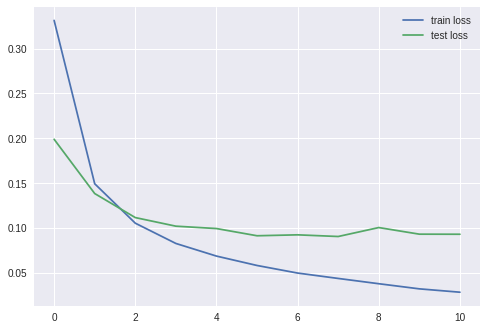

In [88]:
#LP
plt.plot(history_5.history['loss'], label = 'train loss')
plt.plot(history_5.history['val_loss'], label = 'test loss')
plt.legend();

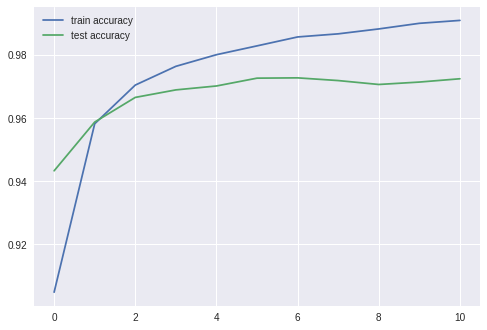

In [89]:
plt.plot(history_5.history['acc'], label = 'train accuracy')
plt.plot(history_5.history['val_acc'], label = 'test accuracy')
plt.legend();
#becoming slightly more overfit, but not bad

### Model 6

In [94]:
%%time
#step 1 define our structure
model6 = Sequential()

#first layer: convulutional layer
model6.add(Conv2D(filters = 64, 
                 kernel_size = 3,
                 input_shape = input_shape))

#need to add pooling later
model6.add(MaxPooling2D(pool_size = 2)) 

#flattening layer
model6.add(Flatten()) 

#output layer (dense layer)
model6.add(Dense(10, activation = 'softmax'))
#step 2 compile
model6.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['acc']) 
early_stopping = EarlyStopping(patience = 8)

#step 3 fit it
history_6 = model6.fit(X_train, y_train,
                     validation_data = (X_test, y_test),
                     epochs = 30,
                     callbacks = [early_stopping])

Epoch 1/30
985/985 [==============================] - 20s 20ms/step - loss: 0.2961 - acc: 0.9151 - val_loss: 0.1719 - val_acc: 0.9511
Epoch 2/30
985/985 [==============================] - 20s 20ms/step - loss: 0.1331 - acc: 0.9611 - val_loss: 0.1227 - val_acc: 0.9634
Epoch 3/30
985/985 [==============================] - 20s 20ms/step - loss: 0.0937 - acc: 0.9724 - val_loss: 0.1047 - val_acc: 0.9693
Epoch 4/30
985/985 [==============================] - 20s 20ms/step - loss: 0.0755 - acc: 0.9779 - val_loss: 0.0991 - val_acc: 0.9710
Epoch 5/30
985/985 [==============================] - 20s 20ms/step - loss: 0.0614 - acc: 0.9817 - val_loss: 0.1024 - val_acc: 0.9676
Epoch 6/30
985/985 [==============================] - 20s 20ms/step - loss: 0.0523 - acc: 0.9833 - val_loss: 0.1004 - val_acc: 0.9704
Epoch 7/30
985/985 [==============================] - 20s 20ms/step - loss: 0.0445 - acc: 0.9852 - val_loss: 0.0871 - val_acc: 0.9747
Epoch 8/30
985/985 [==============================] - 20s 20ms

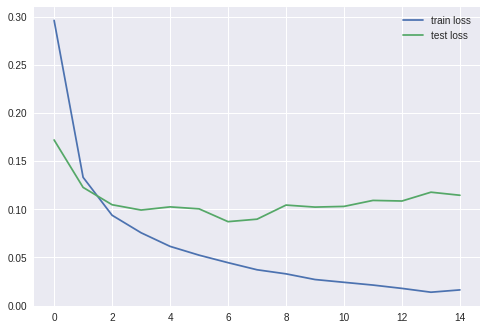

In [95]:
#LP
plt.plot(history_6.history['loss'], label = 'train loss')
plt.plot(history_6.history['val_loss'], label = 'test loss')
plt.legend();

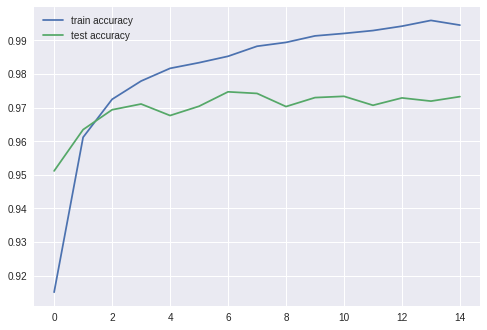

In [96]:
plt.plot(history_6.history['acc'], label = 'train accuracy')
plt.plot(history_6.history['val_acc'], label = 'test accuracy')
plt.legend();

## Model Evaluation
### Classification report
Classification report not only gives us the accuracy, but other metrics such as precision, recall, and f1 score for all of the classes.

In [101]:
y_pred = model5.predict(X_test) #model 5 performed the best
y_pred = np.round(y_pred).astype(int) #https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes
print(classification_report(y_test, y_pred, digits = 4)); #more decimals https://stackoverflow.com/questions/22022410/scikit-classification-report-change-the-format-of-displayed-results

              precision    recall  f1-score   support

           0     0.9855    0.9845    0.9850      1033
           1     0.9797    0.9915    0.9856      1171
           2     0.9668    0.9770    0.9719      1044
           3     0.9679    0.9715    0.9697      1088
           4     0.9811    0.9705    0.9758      1018
           5     0.9857    0.9420    0.9634       949
           6     0.9808    0.9855    0.9831      1034
           7     0.9816    0.9709    0.9762      1100
           8     0.9735    0.9400    0.9564      1016
           9     0.9429    0.9780    0.9602      1047

   micro avg     0.9743    0.9717    0.9730     10500
   macro avg     0.9746    0.9711    0.9727     10500
weighted avg     0.9745    0.9717    0.9730     10500
 samples avg     0.9717    0.9717    0.9717     10500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we saw on the epoch output and line graphs, overall accuracy is 97%

# Testing

Do the same preprocessing/cleaning from train.

### Test Preprocessing

In [111]:
test.shape
#there is no x/y since the test data has no label
#the whole df is the "X"

(28000, 784)

In [112]:
#scale data
#pixel values are 255 (darkness of pixels)
test = test/255

In [113]:
#reshape data
test = test.values.reshape(test.shape[0], 28, 28, 1)

In [114]:
test.shape #check for correct format

(28000, 28, 28, 1)

### Defining the input shape

In [115]:
input_shape = test.shape[1:4]
input_shape

(28, 28, 1)

## Test Model

In [143]:
preds = model5.predict(test)
preds

array([[4.8184936e-09, 3.1698748e-19, 1.0000000e+00, ..., 3.0164624e-10,
        4.3788364e-09, 2.2109703e-09],
       [9.9999714e-01, 1.4432027e-14, 8.1570602e-07, ..., 2.3350194e-10,
        1.3412962e-09, 4.4282810e-11],
       [1.2052805e-09, 2.0237126e-08, 1.4587347e-05, ..., 7.7827417e-07,
        1.2023429e-05, 9.9973959e-01],
       ...,
       [2.5883746e-14, 1.8640672e-13, 9.6400141e-09, ..., 2.8003948e-09,
        8.6630088e-08, 8.1418187e-07],
       [9.4274222e-10, 1.1049677e-14, 9.8858997e-11, ..., 9.5215191e-06,
        3.4893713e-08, 9.9549758e-01],
       [1.8322622e-09, 2.1521402e-17, 9.9999952e-01, ..., 5.0574733e-10,
        3.6073249e-07, 9.8653004e-08]], dtype=float32)

In [144]:
preds.shape

(28000, 10)

In [145]:
y_preds = np.argmax(preds, axis =1)

In [146]:
y_preds.shape

(28000,)

## Testing Evaluation
Evaluate how the model did on the test data by uploading to Kaggle

In [165]:
submission = pd.DataFrame(y_preds, columns = ['Label'])
submission.index.name = 'ImageId'
submission.index+=1 # we need index to start at 1 instead of 0
submission.head()

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3


In [161]:
submission['Label'].value_counts()
#curiosity! what all was predicted?

1    3219
7    2867
9    2852
2    2843
3    2820
0    2791
6    2758
4    2744
8    2693
5    2413
Name: Label, dtype: int64

### Save as csv

In [166]:
submission.to_csv('/content/drive/MyDrive/Work/Independent Projects/Digit Recognizer/submission.csv', index = True) 

# Performance on Testing Set
Upon submitting to Kaggle, the official perfomance of the model is 97.26% on the test data.
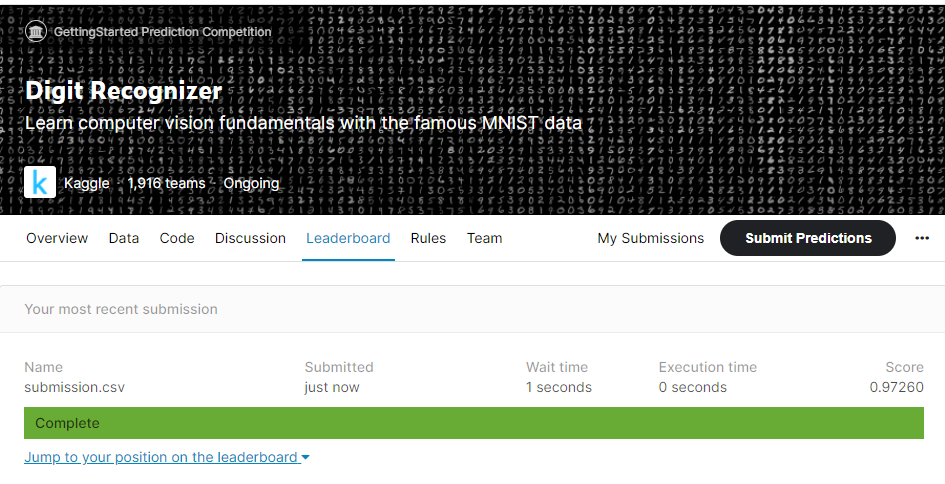